In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

from sklearn.linear_model import LogisticRegression


import matplotlib.pyplot as plt

In [2]:
gene_effect_df = pd.read_csv("GeneExpression.csv").rename(columns = {'Unnamed: 0': 'ModelID'})
model_df = pd.read_csv("Model.csv")

merged_df = pd.merge(gene_effect_df, model_df[['ModelID', 'OncotreePrimaryDisease']], on='ModelID', how='inner')

new_cols = gene_effect_df.columns.tolist()
new_cols.insert(1, "OncotreePrimaryDisease")

gene_df = merged_df[new_cols]

In [3]:
categorical_mapping = {item: idx for idx, item in enumerate(list(gene_df['OncotreePrimaryDisease'].unique()))}
gene_df['Disease as Number'] = gene_df['OncotreePrimaryDisease'].map(categorical_mapping)

gene_df = gene_df.fillna(0)

gene_df = gene_df.set_index('ModelID')

# gene_df.head()

C:\Users\adenl\AppData\Local\Temp\ipykernel_15052\369468172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_df['Disease as Number'] = gene_df['OncotreePrimaryDisease'].map(categorical_mapping)


In [25]:
filtered = list(categorical_mapping.keys())[:15]

gene_df = gene_df[gene_df['OncotreePrimaryDisease'].isin(filtered)]

['Non-Small Cell Lung Cancer',
 'Embryonal Tumor',
 'Melanoma',
 'Intraductal Papillary Neoplasm of the Bile Duct',
 'Bladder Urothelial Carcinoma',
 'Colorectal Adenocarcinoma',
 'Mature T and NK Neoplasms',
 'Liposarcoma',
 'Ampullary Carcinoma',
 'Uterine Sarcoma/Mesenchymal',
 'Mature B-Cell Neoplasms',
 'Renal Cell Carcinoma',
 'Pancreatic Adenocarcinoma',
 'Diffuse Glioma',
 'Esophagogastric Adenocarcinoma']

In [26]:
X = gene_df.drop(columns = ['Disease as Number', 'OncotreePrimaryDisease'])
y = gene_df['Disease as Number']

In [28]:
label_dict = {idx: item for idx, item in enumerate(filtered)}

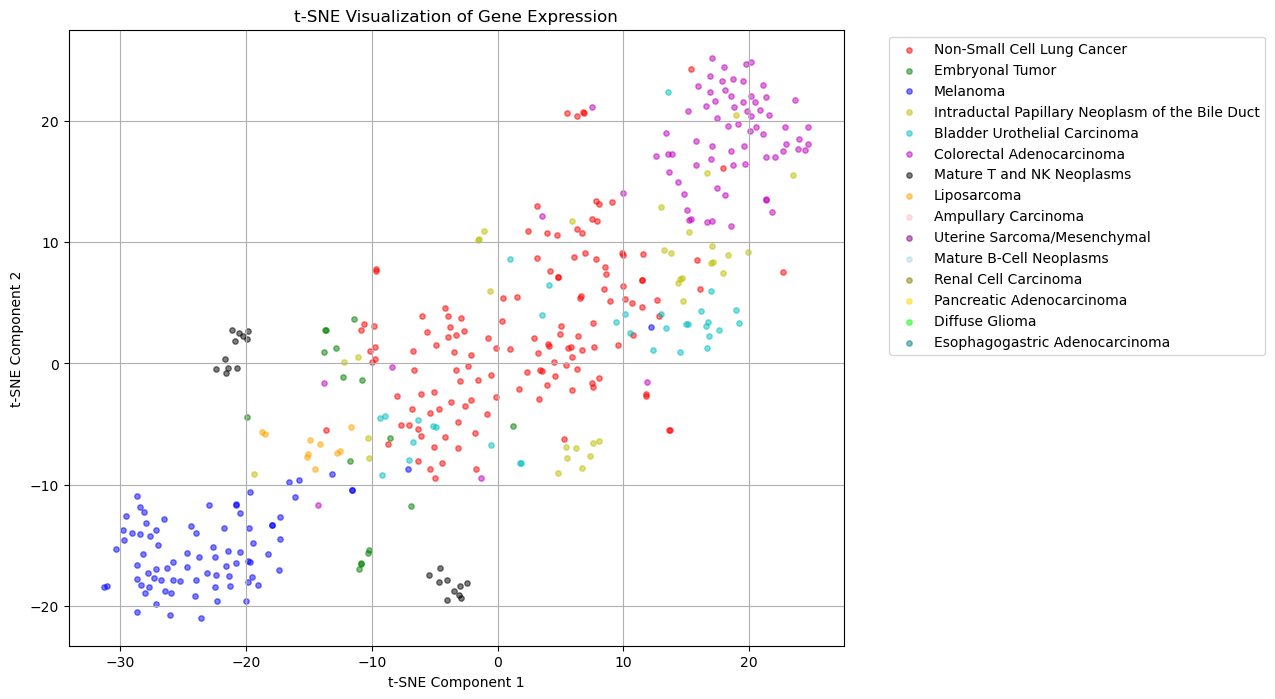

In [34]:
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(X)

colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'orange', 'pink', 'purple', 'lightblue', 'olive', 'gold', 'lime', 'teal']  # Example colors

plt.figure(figsize=(10, 8))
for label in range(15):  # Assuming you have 8 unique labels/classes
    plt.scatter(X_tsne[y == label, 0], X_tsne[y == label, 1], s=15, c=colors[label], alpha=0.5, label=label_dict[label])
plt.title('t-SNE Visualization of Gene Expression')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
